# Importación de librerías

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import re # Expresiones regulares
from sklearn import preprocessing # LabelEncoder

In [2]:
data = pd.read_table("../Dataset/labeledEligibilitySample10k.csv", header = None)

In [3]:
print(data.shape)

(10000, 1)


### Se transforma la variable elegible (la salida) en 0 y 1

In [4]:
clin_trial = pd.DataFrame(np.array(data).reshape(10000,1), columns=['Description'])
clin_trial[:].head(10)

,Description
0,"18518,__label__0,study interventions are Erlot..."
1,"71331,__label__0,study interventions are Antib..."
2,"232342,__label__0,study interventions are Cycl..."
3,"450677,__label__0,study interventions are Pred..."
4,"410008,__label__0,study interventions are Inte..."
5,"307723,__label__0,study interventions are Erlo..."
6,"378773,__label__0,study interventions are Phar..."
7,"479580,__label__0,study interventions are Myco..."
8,"458795,__label__0,study interventions are gamm..."
9,"366518,__label__0,study interventions are Succ..."


In [5]:
clin_trial['Num'], clin_trial['ExtraPart'] = clin_trial['Description'].str.split(',', 1).str
clin_trial=clin_trial.drop(['Num'], axis=1)

clin_trial['Label'], clin_trial['TrashPart'] = clin_trial['ExtraPart'].str.split(',', 1).str
clin_trial['Eligible'] = clin_trial['Label'].str.extract('(\d)', expand=True)
clin_trial=clin_trial.drop(['Label'], axis=1)
clin_trial=clin_trial.drop(['ExtraPart'], axis=1)

clin_trial['Interventions'], clin_trial['Diagnoses'] = clin_trial['TrashPart'].str.split('.', 1).str
clin_trial=clin_trial.drop(['TrashPart'], axis=1)

clin_trial=clin_trial.drop(['Description'], axis=1)

clin_trial.head(10)

,Eligible,Interventions,Diagnoses
0,0,study interventions are Erlotinib Hydrochloride,recurrent midline lethal granuloma of the par...
1,0,study interventions are Antibodies,fallopian tube cancer diagnosis and periphera...
2,0,study interventions are Cyclosporine,recurrent adult diffuse mixed cell lymphoma d...
3,0,study interventions are Prednisolone phosphate,childhood immunoblastic large cell lymphoma d...
4,0,study interventions are Interferon-alpha,stage multiple myeloma diagnosis and serum pr...
5,0,study interventions are Erlotinib Hydrochloride,patients must have carcinoma of unknown prima...
6,0,study interventions are Pharmacological Study,hepatoblastoma diagnosis and two weeks must h...
7,0,study interventions are Mycophenolic Acid,recurrent grade one follicular lymphoma diagn...
8,0,study interventions are gamma-secretase/Notch ...,recurrent non small cell lung cancer diagnosi...
9,0,study interventions are Succinylcholine,untreated childhood medulloblastoma diagnosis...


In [6]:
# Se quita study interventions are puesto que está en todas las muestras de la varialbe Interventions
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace("study interventions are\s", "")
clin_trial.sample(10)

,Eligible,Interventions,Diagnoses
4852,0,Anastrozole,metastatic breast cancer diagnosis and platel...
8712,1,Immunoconjugates,neoplasms diagnosis and impaired cardiac func...
9889,1,"""Volasertib, low dose, d1q3w",neoplasms diagnosis and patients unable to co...
1313,0,Vidarabine,intraocular lymphoma diagnosis and no previou...
9664,1,Thalidomide,non hodgkin lymphoma diagnosis and congenital...
6374,1,Niacinamide,glioblastoma diagnosis and investigational ag...
2594,0,Doxorubicin,stage iia adult soft tissue sarcoma diagnosis...
5119,1,Maleic acid,endometrial undifferentiated carcinoma diagno...
3023,0,Proteasome Inhibitors,solid tumor diagnosis and prior tmz or dtic i...
881,0,AR-42,stage iii adult diffuse small cleaved cell ly...


In [7]:
#Sirve para buscar palabras con esos caracteres

# for name in list(clin_trial.columns):
#     for sample in clin_trial[name]:
#         if re.findall('[+=*^#áÁéÉíÍóÓúÚ\[\]\$,.;:!@¡¿?\{\}\&`~\^\(\)|%_\-<>\'\"]', sample):
#             print(sample, "\n") ## Funciona para detectar caracteres especiales

In [8]:
# Se transforma todo a minúsculas
clin_trial['Interventions'] = clin_trial['Interventions'].str.lower() ##Todo a minúscula
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.lower()     ##Todo a minúscula

#Se reemplazan vocales con tildes en ambas variables
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[áäâà]', 'a', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[éêèë]', 'e', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[íïìî]', 'i', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[óôòö]', 'o', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[úûùü]', 'u', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('["]', '', regex=True)

clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[áäâà]', 'a', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[éêèë]', 'e', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[íïìî]', 'i', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[óôòö]', 'o', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[úûùü]', 'u', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('^\s', '', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('["]', '', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[;]', '', regex=True)



#clin_trial.sample(10)

In [9]:
# Total de categorías diferentes en la variable Interventions
len(np.unique(clin_trial['Interventions'])) 

1426

In [10]:
# Sirve para ver cuantos datos hay por categoría de interventions

datosInt = clin_trial['Interventions'].value_counts()

In [11]:
# Total de categorías diferentes en la variable Diagnoses
len(np.unique(clin_trial['Diagnoses']))

9786

In [12]:
datosDiag = clin_trial['Diagnoses'].value_counts() 
#datosDiag

## Codificación de la variable Interventions

In [13]:
labels = np.unique(clin_trial['Interventions'])

lb_interventions = preprocessing.LabelEncoder()
lb_interventions.fit(labels)
clin_trial['Interventions'] = lb_interventions.transform(clin_trial['Interventions']) 

In [14]:
#clin_trial

# Remover Stop Words

## Preliminares

In [15]:
# Se carga la libreria
from nltk.corpus import stopwords

# Se debe descargar el conjunto de 'Stop Words' la primera vez
import nltk
nltk.download('stopwords')

#Se carga la librería de lematización
#PONER conda install -c conda-forge spacy EN ANACONDA PROMPT
# Y python -m spacy download en_core_web_sm

#Se carga la librería de lematización
import spacy
nlp = spacy.load("en_core_web_sm")

#Se carga la librería de stemming y se inicializa el stemmer
import nltk
from nltk import SnowballStemmer
stemmer=SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Crear las palabras Token

## Lematización

"Dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc), hallar el lema correspondiente. El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra. Es decir, el lema de una palabra es la palabra que nos encontraríamos como entrada en un diccionario tradicional: singular para sustantivos, masculino singular para adjetivos, infinitivo para verbos." -Wikipedia

In [16]:
#https://medium.com/qu4nt/reducir-el-número-de-palabras-de-un-texto-lematización-y-radicalización-stemming-con-python-965bfd0c69fa
toks = []

for sample in clin_trial['Diagnoses']:
    words = nlp(sample)
    lemma = [tok.lemma_.lower() for tok in words]
    #print(lemma)
    toks.append(lemma)
    

## Cargar las Stop Words

In [17]:
# Carga las Stop Words en inglés
stop_words = stopwords.words('english')

## Estaría bien revisar este conjunto 'english'. Pero supongo que es el más útil para nuestro caso también.
# Imprime algunas Stop Words
#stop_words[:100]

## Remover las Stop Words

In [18]:
tokens = []
for tok in toks:
    clean_word = [word for word in tok if word not in stop_words]
    tokens.append(clean_word)

## Stemming

"Es un método para reducir una palabra a su raíz o (en inglés) a un stem." - Wikipedia

In [19]:
stemms = []
for tok in tokens:
    var = [stemmer.stem(token) for token in tok]
    stemms.append(var)

# Bag of Words

In [20]:
def extract_words(sentence):
    words = []
    for i in sentence:
        if i not in words:
            words.append(i)
    return words

def getAll_words(data):
    words = []
    for i in data:
        wordsPerSentence = extract_words(i)
        for j in wordsPerSentence:
            if j not in words:
                words.append(j)
    return words

def wordFrequency(sentence, words):
    sentence_words = sentence
    # frequency word count
    bag = np.zeros(len(words))
    for sw in sentence_words:
        for i,word in enumerate(words):
            if word == sw: 
                bag[i] += 1
                
    return np.array(bag)

def bagOfWords(data, words):
    bow = []
    for i in data:
        freq = wordFrequency(i, words)
        bow.append(freq)
    return bow

In [21]:
words = getAll_words(stemms)
bow = bagOfWords(stemms, words)

In [22]:
bowArray = np.asarray(bow)
wordsArray = np.asarray(words)
df = pd.DataFrame(data=bowArray, columns= wordsArray)

In [23]:
del clin_trial['Diagnoses']
clin_trial_full = pd.concat([clin_trial, df], axis=1)
clin_trial_full

,Eligible,Interventions,recurr,midlin,lethal,granuloma,paranas,sinus,nasal,caviti,...,kaposiform_hemangioendothelioma,khe,damag,peroxid,color,bleach,streak,perm,relax,oxid
0,0,464,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,349,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,1,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,1,1201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,1,939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
clin_trial_full.to_hdf('bagOfWords&interventios.h5', key = 'clin_trial')

In [25]:
#stemms

In [26]:
bagOfWords = pd.read_hdf('bagOfWords&interventios.h5', 'clin_trial')

In [27]:
bagOfWords

,Eligible,Interventions,recurr,midlin,lethal,granuloma,paranas,sinus,nasal,caviti,...,kaposiform_hemangioendothelioma,khe,damag,peroxid,color,bleach,streak,perm,relax,oxid
0,0,464,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,349,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,1,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,1,1201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,1,939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Ordenar y eliminar palabras

In [28]:
import operator

bowDict = {}

for column in bagOfWords:
    if column == 'Eligible' or column == 'Interventions':
        continue
    bowDict[column] = bagOfWords[column].sum() #Cuenta palabras

bowDict_sort = sorted(bowDict.items(), key=operator.itemgetter(1), reverse=True)

len(bowDict_sort)
# print(bowDict_sort)

5288

In [29]:
bowDict_sort2 = []
i = 0
for word in bowDict_sort:    
    if word[1] <= 20.0: #Para eliminar con un umbral
        continue
    bowDict_sort2.append(bowDict_sort[i][0])
    i = i + 1
del bowDict_sort2[0]

In [30]:
print(len(bowDict_sort2), len(bowDict_sort))

873 5288


# TF-IDF 
Term frequency – Inverse document frequency

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
#bowDict_sort2

In [33]:
stemmsT = [ ' '.join(stemms[item]) for item in range (len(stemms))] #Se transforma de lista de listas a una lista

In [34]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(stemmsT)

In [35]:
cols = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()

In [36]:
df = pd.DataFrame(data=denselist, columns= cols)

In [37]:
#df

In [38]:
aux = df
for word in df:
    if word not in bowDict_sort2:
        del aux[word]

In [39]:
aux.shape

(10000, 867)

In [40]:
df = aux

# Concatenación de dfs

In [41]:
clin_trial_full = pd.concat([clin_trial, df], axis=1)
clin_trial_full

,Eligible,Interventions,abdomin,abil,abl,abnorm,abscess,absenc,absolut,absorpt,...,within,without,woman,would,wound,write,year,york,zero,zone
0,0,464,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0,101,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.204349,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0,349,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0,1052,0.0,0.0,0.0,0.119754,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.099676,0.0
4,0,708,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1109,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
9996,1,200,0.0,0.0,0.0,0.256094,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
9997,1,1201,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.210823,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
9998,1,939,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.366276,0.0,0.0,0.0,0.000000,0.0


# Guardado del modelo

In [42]:
clin_trial_full.to_hdf('bagOfWords10k_TFIDF-BoW.h5', key = 'clin_trial')

In [43]:
df_loaded = pd.read_hdf('bagOfWords10k_TFIDF-BoW.h5', 'clin_trial')

In [44]:
df_loaded

,Eligible,Interventions,abdomin,abil,abl,abnorm,abscess,absenc,absolut,absorpt,...,within,without,woman,would,wound,write,year,york,zero,zone
0,0,464,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0,101,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.204349,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0,349,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0,1052,0.0,0.0,0.0,0.119754,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.099676,0.0
4,0,708,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1109,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
9996,1,200,0.0,0.0,0.0,0.256094,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
9997,1,1201,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.210823,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
9998,1,939,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.366276,0.0,0.0,0.0,0.000000,0.0


In [ ]:
eligible = df_loaded['Eligible'].values #Para ver las palabras por clase

dict_0 = {}
dict_1 = {}

for col in df_loaded:
    if(col == 'Eligible' or col == 'Interventions'):
        continue
    ar = df_loaded[col].values
    condlist = [(eligible == "1") & (ar != 0.0), (eligible == "0") & (ar != 0.0)]
    choicelist = [1, 2]
    res = np.select(condlist, choicelist)
    
    dict_0[col] = len(res[res==2])
    dict_1[col] = len(res[res==1])
    
#     print(col + " tiene ", len(res[res==2]), " apariciones en la clase 0")
#     print(col + " tiene ", len(res[res==1]), " apariciones en la clase 1 \n")

# Algoritmos de clasificación

In [45]:
clin_trial_values = clin_trial_full.values
Y = clin_trial_values[:, 0]
Y = Y.astype(int)
X = clin_trial_values[:, 1:]

In [46]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

In [47]:
# def plot_roc_curve(fpr, tpr):
#     plt.plot(fpr, tpr, color='orange', label='ROC')
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#     plt.xlabel('Tasa de Falsos Positivos')
#     plt.ylabel('Tasa de Verdaderos Positivos')
#     plt.title('Curva ROC')
#     plt.legend()
#     plt.show()

In [48]:
def plot_roc(Xtest, Ytest, probs, xlabel):
    ns_probs = [0 for _ in range(len(Ytest))]
    
    probs = probs[:, 1]
    ns_auc = roc_auc_score(Ytest, ns_probs)
    auc = roc_auc_score(Ytest, probs)  

    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (auc))

    ns_fpr, ns_tpr, _ = roc_curve(Ytest, ns_probs)
    fpr, tpr, _ = roc_curve(Ytest, probs)   

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label= xlabel)

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

# Naive Bayes

In [49]:
from sklearn.preprocessing import MinMaxScaler # Escala los datos
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot as skplt 
from string import ascii_uppercase 
# import seaborn as sns
import qgrid
import time
#from sklearn.externals import joblib # Para guardar el modelo
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
def model_NB(impresion = False):

    tiempo_i = time.time()

    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    nb = GaussianNB()
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)

        nb.fit(Xtrain, Ytrain)
        pred = nb.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_
                
        errores[j] = classification_error(pred, Ytest)
          
    if impresion == True:
        #Curva ROC
        nb_probs = nb.predict_proba(Xtest)
        
        plot_roc(Xtest, Ytest, nb_probs, "Naive Bayes")
#         auc = roc_auc_score(Ytest, pred)
#         print('AUC: %.2f' % auc)
#         fpr, tpr, thresholds = roc_curve(Ytest, pred)
#         plot_roc_curve(fpr, tpr)
        #Matriz de confusión
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.811


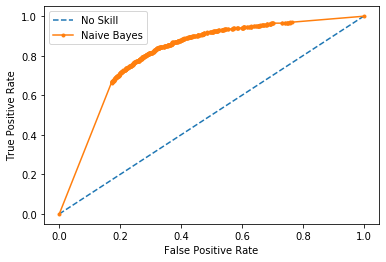

Eficiencia 0.7457  Int_Eficiencia 0.00458148447558211  Sensibilidad 0.7452866927711425  Int_Sensibilidad 0.0636982397026365  Precision 0.7494472874360811  Int_Precision 0.029837350060561783  F-Score 0.7444739148037113  Int_F-Score 0.018510960269429416  Error_Prueba 0.25429999999999997  Int_Error 0.0045814844755821225  Tiempo ejecución 7.557878017425537


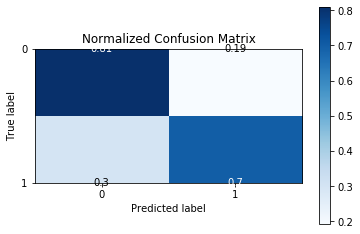

In [52]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_NB(impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [53]:
# joblib.dump(nb, 'naive_bayes.pkl') # Guardo el modelo.

# Logistic Regression

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

In [55]:
def LRC(c, slv, impresion = False):

    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    LR = LogisticRegression(C=c, solver=slv, max_iter = 200)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        LR.fit(Xtrain, Ytrain)
        pred = LR.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_

                
        errores[j] = classification_error(pred, Ytest)
           
    if impresion == True:
        #Curva ROC
        
        lr_probs = LR.predict_proba(Xtest)
        
        plot_roc(Xtest, Ytest, lr_probs, "Logistic Regression")
        
#         auc = roc_auc_score(Ytest, pred)
#         print('AUC: %.2f' % auc)
#         fpr, tpr, thresholds = roc_curve(Ytest, pred)
#         plot_roc_curve(fpr, tpr)
        #Matriz de confusión
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.863


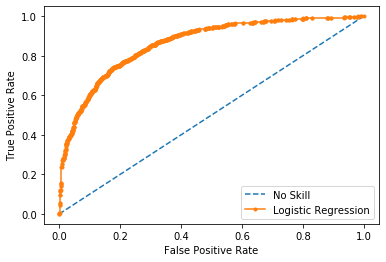

Eficiencia 0.7857000000000001  Int_Eficiencia 0.011580587204455555  Sensibilidad 0.7859216280268008  Int_Sensibilidad 0.01734293491449185  Precision 0.7859172328711432  Int_Precision 0.017432949774348134  F-Score 0.7856997220633092  Int_F-Score 0.01158306228589098  Error_Prueba 0.21430000000000002  Int_Error 0.01158058720445556  Tiempo ejecución 6.8892621994018555


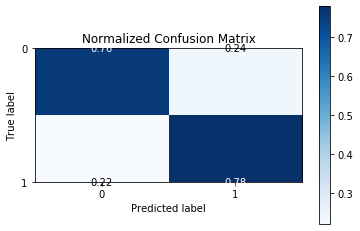

In [56]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(1, 'liblinear', impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [57]:
pd.options.mode.chained_assignment = None

#randn = np.random.randn
df_types = pd.DataFrame({
    'Tipo de solver' : pd.Series(['newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 
                          'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 
                          'liblinear', 'liblinear', 'liblinear','liblinear','liblinear','liblinear',
                          'sag','sag','sag','sag','sag','sag',
                          'saga','saga','saga','saga','saga','saga']),
    'Valor de regularización' : pd.Series([0.1,0.5,1,1.5,2,3,
                                           0.1,0.5,1,1.5,2,3,
                                           0.1,0.5,1,1.5,2,3,
                                           0.1,0.5,1,1.5,2,3,
                                           0.1,0.5,1,1.5,2,3])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Tipo de solver', 'Valor de regularización'], inplace=True)

i = 0
for k, n in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(n, k, impresion = False)
    df_types["Eficiencia"][i] = Acc
    df_types["Int_Eficiencia"][i] = IntAcc
    df_types["Sensibilidad"][i] = Sen
    df_types["Int_Sensibilidad"][i] = IntSen
    df_types["Precision"][i] = Pre
    df_types["Int_Precision"][i] = IntPre
    df_types["F-Score"][i] = f
    df_types["Int_F-Score"][i] = IntF
    df_types["Error_Prueba"][i] = error
    df_types["Int_error"][i] = stdError
    df_types["Tiempo de ejecución"][i] = tiempo
    
    i += 1
    
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [58]:
qgrid_widget.get_changed_df()

Eficiencia  \
Tipo de solver Valor de regularización                       
newton-cg      0.1                      0.7829999999999999   
               0.5                                  0.7866   
               1.0                      0.7829999999999999   
               1.5                      0.7847000000000001   
               2.0                                  0.7949   
               3.0                      0.7830999999999999   
lbfgs          0.1                                  0.7769   
               0.5                      0.7937000000000001   
               1.0                                  0.7864   
               1.5                      0.7876000000000001   
               2.0                      0.7855000000000001   
               3.0                                  0.7899   
liblinear      0.1                                   0.783   
               0.5                                  0.7841   
               1.0                                   0.786   
               1.5                                  0.7876   
               2.0                                  0.7899   
               3.0                                  0.7812   
sag            0.1                                  0.7834   
               0.5                                    0.78   
               1.0                                  0.7986   
               1.5                      0.7870999999999999   
               2.0                                  0.7938   
               3.0                      0.7958999999999999   
saga           0.1                                   0.784   
               0.5                      0.7907000000000001   
               1.0                      0.7912999999999999   
               1.5                      0.7897000000000001   
               2.0                                  0.7865   
               3.0                                  0.7841   

                                               Int_Eficiencia  \
Tipo de solver Valor de regularización                          
newton-cg      0.1                       0.004935585071701241   
               0.5                       0.009455157322858234   
               1.0                       0.013159027319676761   
               1.5                       0.008608716512930376   
               2.0                       0.007306846104852643   
               3.0                          0.005354437412091   
lbfgs          0.1                       0.005530822723609922   
               0.5                       0.008710338684574789   
               1.0                      0.0066030296076876665   
               1.5                      0.0045431266766401855   
               2.0                      0.0033511192160232007   
               3.0                       0.011687172455303273   
liblinear      0.1                        0.00770713954719906   
               0.5                       0.005006995106848006   
               1.0                       0.005885575587824837   
               1.5                       0.006627216610312339   
               2.0                       0.003734969879396641   
               3.0                      0.0048826222462934775   
sag            0.1                       0.007681145747868601   
               0.5                      0.0067705243519243195   
               1.0                       0.004983974317750847   
               1.5                       0.005233545643251802   
               2.0                       0.005674504383644468   
               3.0                       0.003923009049186628   
saga           0.1                      0.0065053823869162366   
               0.5                      0.0045552167895721585   
               1.0                      0.0053469617541179225   
               1.5                       0.007190966555338729   
               2.0                       0.006930367955599471   
               3.0                       0.00653

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier # Se llama a la librería del método Random Forest

In [67]:
def model_RF(estimadores, caracteristicas, impresion = False):
        
    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    
    RF = RandomForestClassifier(n_estimators=estimadores, max_features =caracteristicas, n_jobs = -1)
    
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        RF.fit(Xtrain, Ytrain)
        pred = RF.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_

        
        errores[j] = classification_error(pred, Ytest)
       
    
    if impresion == True:
        #Curva ROC
        
        rf_probs = RF.predict_proba(Xtest)
        
        plot_roc(Xtest, Ytest, rf_probs, "Random Forest")
#         auc = roc_auc_score(Ytest, pred)
#         print('AUC: %.2f' % auc)
#         fpr, tpr, thresholds = roc_curve(Ytest, pred)
#         plot_roc_curve(fpr, tpr)
        #Matriz de confusión
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)
    

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.889


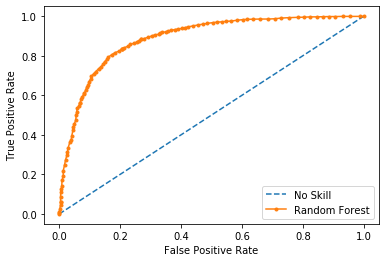

Eficiencia 0.8025  Int_Eficiencia 0.0077323993688892985  Sensibilidad 0.8025301236245237  Int_Sensibilidad 0.02286572726001596  Precision 0.803014260041296  Int_Precision 0.016705786023244212  F-Score 0.8023766555249083  Int_F-Score 0.009098506838487622  Error_Prueba 0.1975  Int_Error 0.007732399368889327  Tiempo ejecución 16.5510470867157


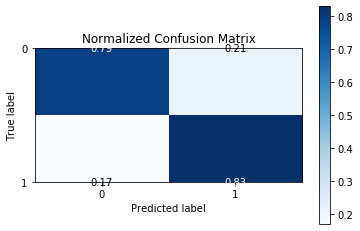

In [68]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(100, 50, impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [62]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,5,
                                     10,10,10,10,10,10,10,
                                     20,20,20,20,20,20,20,
                                     50,50,50,50,50,50,50,
                                     100,100,100,100,100,100,100]), 
    'Variables analizadas por nodo' : pd.Series([10,50,100,200,250,350,500,
                                                 10,50,100,200,250,350,500,
                                                 10,50,100,200,250,350,500,
                                                 10,50,100,200,250,350,500,
                                                 10,50,100,200,250,350,500])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)

for n, k in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(n, k, impresion = False)
    df_types["Eficiencia"][n,k] = Acc
    df_types["Int_Eficiencia"][n,k] = IntAcc
    df_types["Sensibilidad"][n,k] = Sen
    df_types["Int_Sensibilidad"][n,k] = IntSen
    df_types["Precision"][n,k] = Pre
    df_types["Int_Precision"][n,k] = IntPre
    df_types["F-Score"][n,k] = f
    df_types["Int_F-Score"][n,k] = IntF
    df_types["Error_Prueba"][n,k] = error
    df_types["Int_error"][n,k] = stdError
    df_types["Tiempo de ejecución"][n,k] = tiempo


#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [63]:
qgrid_widget.get_changed_df()

Eficiencia  \
Numero de arboles Variables analizadas por nodo                       
5                 10                                         0.7517   
                  50                                         0.7653   
                  100                            0.7552000000000001   
                  200                                        0.7591   
                  250                                        0.7588   
                  350                            0.7583000000000001   
                  500                                        0.7621   
10                10                                         0.7717   
                  50                                         0.7757   
                  100                            0.7696000000000001   
                  200                                        0.7738   
                  250                                        0.7681   
                  350                                        0.7705   
                  500                            0.7698999999999999   
20                10                                         0.7908   
                  50                                         0.7854   
                  100                                        0.7874   
                  200                                        0.7842   
                  250                            0.7853000000000001   
                  350                                        0.7862   
                  500                                        0.7847   
50                10                             0.8009999999999999   
                  50                                         0.7942   
                  100                            0.7889999999999999   
                  200                                         0.786   
                  250                            0.7871999999999999   
                  350                                        0.7967   
                  500                            0.7806000000000001   
100               10                                          0.806   
                  50                             0.7997999999999998   
                  100                                        0.8049   
                  200                                        0.7951   
                  250                                         0.792   
                  350                                        0.7967   
                  500                                        0.7826   

                                                        Int_Eficiencia  \
Numero de arboles Variables analizadas por nodo                          
5                 10                              0.008449260322655491   
                  50                              0.009638983348880732   
                  100                             0.006529931086925797   
                  200                             0.008262566187329427   
                  250                             0.007402702209328709   
                  350                             0.014023908157143666   
                  500                             0.008543418519538897   
10                10                               0.00871492971859214   
                  50                              0.006445928947793304   
                  100                             0.006764613810115115   
                  200                             0.007000000000000008   
                  250                             0.009517877914745482   
                  350                             0.005673623181001732   
                  500                             0.001506651917331951   
20                10                              0.004758150901348103   
                  50                               0.01021958903283296   
                  100                            0.0011832159566199242   
                  200  